In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
spray_csv = './west_nile/input/spray.csv'
train_csv = './west_nile/input/train.csv'
weather_csv = './west_nile/input/weather.csv'

In [3]:
spray = pd.read_csv(spray_csv)
train = pd.read_csv(train_csv)
weather = pd.read_csv(weather_csv)

In [4]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [5]:
print "Spray shape", spray.shape
print "Train shape", train.shape
print "Weather shape", weather.shape

Spray shape (14835, 4)
Train shape (10506, 12)
Weather shape (2944, 22)


In [6]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [7]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [8]:
train_drop = ['Address', 'Block', 'AddressNumberAndStreet', 'AddressAccuracy']
train_clean = train.drop(train_drop, axis=1)

In [9]:
train_clean.sample(10)

,Date,Species,Street,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
5555,2009-08-27,CULEX PIPIENS/RESTUANS,S TORRENCE AVE,T200,41.678618,-87.559308,4,0
670,2007-07-25,CULEX PIPIENS/RESTUANS,S STONY ISLAND AVE,T138,41.726465,-87.585413,50,0
6194,2011-06-17,CULEX PIPIENS/RESTUANS,E 130TH ST,T221,41.659112,-87.538693,2,0
393,2007-07-11,CULEX PIPIENS,W PERSHING RD,T060,41.823065,-87.678378,1,0
5214,2009-08-07,CULEX PIPIENS/RESTUANS,W 95TH ST,T094,41.720848,-87.666014,17,0
4370,2009-06-26,CULEX PIPIENS/RESTUANS,W 116TH ST,T158,41.682587,-87.707973,4,0
6811,2011-07-25,CULEX PIPIENS/RESTUANS,N MOSELL AVE,T008,42.008314,-87.777921,15,0
2942,2007-09-05,CULEX PIPIENS/RESTUANS,E 67TH ST,T073,41.773215,-87.600880,5,0
10237,2013-09-12,CULEX PIPIENS/RESTUANS,S KOLMAR,T114,41.798697,-87.736812,9,1
4539,2009-07-06,CULEX PIPIENS/RESTUANS,S TORRENCE AVE,T200,41.678618,-87.559308,6,0


In [10]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


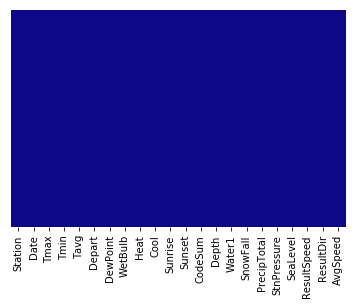

In [11]:
#visualise null values using 
sns.heatmap(weather.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


In [14]:
for col in train.keys():
    print col
    print train[col].value_counts()

Date
2007-08-01    551
2007-08-15    276
2013-08-01    186
2007-08-24    186
2007-08-21    186
2007-10-04    185
2007-08-07    184
2013-07-12    182
2013-07-19    182
2013-08-08    181
2011-07-25    179
2011-07-15    177
2007-09-24    167
2013-08-22    167
2009-07-17    164
2013-08-15    157
2013-07-25    153
2007-07-11    152
2011-07-11    146
2013-08-29    143
2013-09-06    143
2011-08-05    140
2007-08-22    139
2013-09-12    139
2009-07-31    139
2011-07-29    138
2011-09-12    138
2007-08-02    137
2007-09-12    135
2009-08-07    131
             ... 
2007-07-27     83
2009-06-05     77
2013-06-07     77
2007-07-02     74
2009-07-13     71
2007-06-26     70
2009-10-01     65
2011-09-01     62
2013-06-27     62
2011-06-10     62
2011-09-30     61
2013-06-28     60
2007-06-05     60
2009-05-28     59
2009-09-03     55
2007-08-17     54
2009-08-27     54
2009-06-22     52
2007-09-06     50
2011-09-02     50
2007-06-29     46
2007-07-19     45
2009-06-15     32
2009-06-29     31
2007-

In [15]:
for col in weather.keys():
    print col
    print weather[col].unique()

Station
[1 2]
Date
['2007-05-01' '2007-05-02' '2007-05-03' ..., '2014-10-29' '2014-10-30'
 '2014-10-31']
Tmax
[ 83  84  59  60  66  67  78  68  82  80  77  76  70  73  64  65  69  90
  62  61  71  79  87  89  88  75  85  86  81  72  63  91  92  93  74  94
  54  53  56  57  58  55  50  95  52  47  45  51  48  44  49  46  96  99
 100 101  97  98 102 103 104  42  41]
Tmin
[50 52 42 43 46 48 49 51 53 54 47 60 61 63 56 59 44 57 45 55 66 65 70 68 62
 67 64 58 71 69 73 75 72 74 39 41 40 37 34 38 35 36 33 31 32 76 77 29 78 79
 80 81 82 83]
Tavg
['67' '68' '51' '52' '56' '58' 'M' '60' '59' '65' '70' '69' '71' '61' '55'
 '57' '73' '72' '53' '62' '63' '74' '75' '78' '76' '77' '66' '80' '64' '81'
 '82' '79' '85' '84' '83' '50' '49' '46' '48' '45' '54' '47' '44' '40' '41'
 '38' '39' '42' '37' '43' '86' '87' '89' '92' '88' '91' '93' '94' '90' '36']
Depart
['14' 'M' '-3' ' 2' ' 4' ' 5' '10' '12' '13' '-2' '15' '11' '-4' '-6' ' 8'
 '-5' ' 1' ' 9' ' 6' '-9' '-8' ' 3' ' 0' '-1' '-7' ' 7' '-14' '18' '16'

In [16]:
# replace some missing values and T with -1
weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)

In [17]:
weather['Tavg'] = (weather['Tmax'] + weather['Tmin'])/2

In [18]:
# convert Tavg into int
weather['Tavg'] = weather['Tavg'].apply(lambda x: int(x))
weather['WetBulb'] = weather['WetBulb'].apply(lambda x: int(x))

In [19]:
# convert avg temp and wet bulb to degree celsius (Deduct 32, then multiply by 5, then divide by 9)
weather['Tavg_degree'] = (weather['Tavg']-32)*5/9
weather['WetBulb_degree'] = (weather['WetBulb']-32)*5/9

In [20]:
weather_clean = weather[['Station', 'Date', 'Tavg', 'Tavg_degree', 'WetBulb', 'WetBulb_degree']].copy()
weather_clean.sample(6)

,Station,Date,Tavg,Tavg_degree,WetBulb,WetBulb_degree
2348,1,2013-07-10,75,23.888889,70,21.111111
1306,1,2010-08-10,82,27.777778,74,23.333333
848,1,2009-06-26,77,25.000000,-1,-18.333333
947,2,2009-08-14,77,25.000000,66,18.888889
1352,1,2010-09-02,74,23.333333,70,21.111111
1440,1,2010-10-16,55,12.777778,48,8.888889


In [21]:
# difference between dry and wet bulb
weather_clean['diff'] = weather_clean['Tavg_degree'] - weather_clean['WetBulb_degree']

In [25]:
# 100 - ((350*(dry-wet))/dry)
weather_clean['Humidity'] = 100 - ((350*weather_clean['diff'])/weather_clean['Tavg_degree'])
weather_clean['Humidity'] = weather_clean['Humidity'].apply(lambda x: round(x,2))

In [26]:
weather_clean.sample(10)

,Station,Date,Tavg,Tavg_degree,WetBulb,WetBulb_degree,diff,Humidity
2799,2,2014-08-20,77,25.000000,71,21.666667,3.333333,53.33
1531,2,2011-05-30,77,25.000000,70,21.111111,3.888889,45.56
818,1,2009-06-11,58,14.444444,54,12.222222,2.222222,46.15
788,1,2009-05-27,64,17.777778,60,15.555556,2.222222,56.25
1983,2,2012-07-11,77,25.000000,65,18.333333,6.666667,6.67
1108,1,2010-05-03,61,16.111111,53,11.666667,4.444444,3.45
848,1,2009-06-26,77,25.000000,-1,-18.333333,43.333333,-506.67
1271,2,2010-07-23,83,28.333333,74,23.333333,5.000000,38.24
2555,2,2013-10-21,45,7.222222,40,4.444444,2.777778,-34.62
2656,1,2014-06-10,61,16.111111,55,12.777778,3.333333,27.59


In [ ]:
weather_clean[weather_clean['Station']==1]